In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import json

import matplotlib.pyplot as plt


In [49]:
import os
#os.environ["OMP_NUM_THREADS"] = "1"


In [3]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# Your KMeans code goes here


#### This is for the tracks csv

In [4]:
def makeTHATdf():
    df = pd.read_csv("tracks.csv")
    df = df.dropna()
    return df

In [5]:
#makeTHATdf(); FUN fact, the ";" supresses the output of data!.....

In [6]:
#df = makeTHATdf()

In [7]:
#df

### This is for Ms.Spindt's vetting playlist

In [8]:
#df2 = pd.read_json("vetting_playlist.json")

In [9]:
def VettingPL():
    with open("vetting_playlist.json", 'r') as file:
        data = json.load(file)
    
    data.keys()
    floridaKeys = data.keys()
    
    songs = []
    
    for item in data.get("tracks", {}).get("items", []):
        track = item.get("track", None)
        if track:
            song_info = {
                "id": track.get("id"),
                "name": track.get("name"),
                "album": track.get("album", {}).get("name"),
                "artist": track.get("album", {}).get("artists", [{}])[0].get("name"),
                "release_date": track.get("album", {}).get("release_date"),
                "image_url": track.get("album", {}).get("images", [{}])[0].get("url")
            }
            songs.append(song_info)

    df2 = pd.DataFrame(songs)
    return df2


In [10]:
#df2 = VettingPL()

In [11]:
#df2.info()

#### 1st Feature! This is getting the years from the release dates in order to find the songs that are within the 
#### prefered time range which was around 2010~ish

In [12]:
def Feature1(df):
    df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
    df["release_year"] = df["release_date"].dt.year
    return df
    miniDF = df[(df["release_year"] >= 2000) & (df["release_year"] <= 2020)]


In [13]:
#df["release_date"]

In [14]:
#This is for feature 2, it will measure the instrumentalness of music(if it's just voice or instruments)
def Feature2(df, num_bins):
    #bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0001]   # This is ancient code
    #labels = [1, 2, 3, 4, 5]
    
    bins = np.linspace(0, 1.0001, num_bins + 1)
    labels = range(1, num_bins + 1)
    
    df['instru_encode'] = pd.cut(df['instrumentalness'], bins=bins, labels=labels, right=False)
    return df

In [15]:
# Function for feature 3, 'energy' column will be used for 
def Feature3(df, numy_bins):
    bins = np.linspace(0, 1.0001, numy_bins + 1)
    labels = range(1, numy_bins + 1)
    
    df['energy_enco'] = pd.cut(df['energy'], bins=bins, labels=labels, right=False)

    return df
#Use this line of code to call this function

#df['energy_encoded'] = df['energy'].apply(Feature3)


In [16]:
# Function for feature4, this will measure the speechiness, for the prefered type of music
# Encoding:
# 1 = 0 - 0.2
#
#def Feature4(speechiness):
    #for speech in speechiness:
    #if 0 <= speechiness <= 0.2:
        #return 1
    #elif 0.21 <= speechiness<= 0.40:
        #return 2
    #elif 0.41 <= speechiness<= 0.60:
        #return 3
    #elif 0.61 <= speechiness<= 0.80:
        #return 4
    #else:
        #return 5
#Same here, use this line of code
#df['speechy_enco'] = df['speechiness'].apply(Feature4)
    


In [17]:
def Feature4(speechiness):
    return min(int(speechiness * 200) + 1, 200)

#df['speechy_enco'] = df['speechiness'].apply(Feature4)


#### ***Testing Code***

In [18]:
#df.info()

In [19]:
df = makeTHATdf()
df2 = VettingPL()

In [20]:
df = Feature1(df) #This is release year(works fine)

In [21]:
#df.info()

In [22]:
df = Feature2(df, 200) #This is the intru_enco(works fine), might want to work on the NA values, also, change the type

In [23]:
df = Feature3(df, 100)

In [24]:
#df['energy_encoded'] = df['energy'].apply(Feature3)
df['speechy_enco'] = df['speechiness'].apply(Feature4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586601 entries, 0 to 586671
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586601 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586601 non-null  int64         
 3   duration_ms       586601 non-null  int64         
 4   explicit          586601 non-null  int64         
 5   artists           586601 non-null  object        
 6   id_artists        586601 non-null  object        
 7   release_date      448010 non-null  datetime64[ns]
 8   danceability      586601 non-null  float64       
 9   energy            586601 non-null  float64       
 10  key               586601 non-null  int64         
 11  loudness          586601 non-null  float64       
 12  mode              586601 non-null  int64         
 13  speechiness       586601 non-null  float64       
 14  acousticn

In [37]:
#df.info()

In [27]:
#df2.head()

In [28]:
#df[df['release_date'] == 'Better Than']

In [29]:
df2["release_date"] = pd.to_datetime(df2["release_date"], errors="coerce")


In [30]:
#df3 = pd.merge(df, df2, on=['name', 'release_date'], how='left')
df3 = pd.merge(df2, df, on=['name', 'release_date'], how='inner')

In [31]:
# This was us manually assigning the actual date for Funeralopolis,  because it didn't have a date and didn't feel like dropping
# that single row buahahaha! Plus, it was the only NaN for the df3
df3.loc[34, 'release_year'] = 2000
df3.loc[34, 'release_date'] = pd.to_datetime('2000-10-10')


In [32]:
df.loc[172582, 'release_year'] = 2000
df.loc[172582, 'release_date'] = pd.to_datetime('2000-10-10')

In [33]:
df.dropna(inplace=True)


In [34]:
#df3.info()

In [35]:
df3 = df3.drop(['image_url', 'id_y', 'id_artists', 'duration_ms', 'artists', 'key', 'time_signature', 'tempo', 'liveness',
 'mode'], axis=1)


In [38]:
df = df.drop(['id_artists', 'danceability', 'key', 'loudness', 'mode', 'liveness', 'tempo', 'time_signature'], axis=1)

KeyError: "['id_artists', 'danceability', 'key', 'loudness', 'mode', 'liveness', 'tempo', 'time_signature'] not found in axis"

In [ ]:
#df.info()

In [ ]:
df3.info()

In [ ]:
#df3[df3["release_year"].isna()]
#df[(df['instru_encode'] == 5) & (df['instrumentalness'] == 1)]

In [ ]:
#df[df['instrumentalness'] == 0]

In [ ]:
#df[df['name'] == 'Funeralopolis']

In [ ]:
#df3.loc[34]

In [ ]:
df3.head(41)

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


#### There! The data set it finally set for action!
#### Now we gonna do K-means clustering here!

#### K Means Clustering

In [40]:
k_df = df3[['release_year', 'energy']]
#k_df

In [41]:
modelK = KMeans(n_clusters = 4) 
#  Clusters |  Silhoutte Score
#    2      | 0.503
#    3      | 0.4702
#    4      | 0.48048

In [42]:
modelK.fit(k_df)

KMeans(n_clusters=4)

In [43]:
modelK.cluster_centers_
# we will use the 2008 cluster with a song of 85 enco
# when only using 'energy' instead of encode, the sill score increased and the data cluster that we gonna use is
# number 4: 2007 with an energy of 0.745

array([[2.01521053e+03, 5.41105263e-01],
       [1.99857143e+03, 6.31714286e-01],
       [2.00716667e+03, 7.45166667e-01],
       [1.99033333e+03, 7.14333333e-01]])

In [44]:
sil_score = silhouette_score(k_df, modelK.labels_)
sil_score

0.6426655094544746

In [45]:
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(k_df)
    sse.append(kmeans.inertia_)

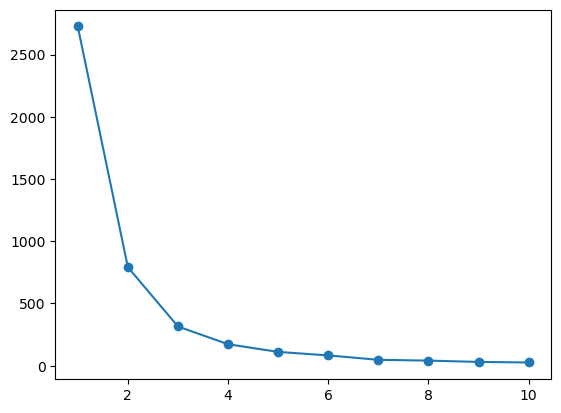

In [46]:
plt.plot(k_range, sse, marker='o')


##### This is for the bigger df

In [58]:
df_08 = df[df['release_year'] == 2008]


In [63]:
#df_08.info()
k_08 = df_08[['release_year', 'energy_enco']]


In [64]:
model_08 = KMeans(n_clusters = 4) 

In [65]:
model_08.fit(k_08)

KMeans(n_clusters=4)

In [66]:
#k_08.info()

In [67]:
model_08.cluster_centers_

array([[2008.        ,   70.22445044],
       [2008.        ,   26.05761719],
       [2008.        ,   89.3525575 ],
       [2008.        ,   50.51128512]])

In [68]:
sil_08 = silhouette_score(k_08, model_08.labels_)
sil_08

0.5625861399991746

In [74]:
df08_1 = df_08[df_08['energy_enco'] >= 8]

In [76]:
#df08_1.info()

In [79]:
garlic = df08_1[['release_year', 'energy_enco']]
baja_blast = KMeans(n_clusters = 4) 
baja_blast.fit(garlic)

KMeans(n_clusters=4)

In [80]:
baja_blast.cluster_centers_

array([[2008.        ,   72.03506787],
       [2008.        ,   28.47316637],
       [2008.        ,   52.24092117],
       [2008.        ,   90.29396126]])

In [81]:
sil_baja = silhouette_score(garlic, baja_blast.labels_)
sil_baja

0.5580004299079563

In [86]:
df08_1[(df08_1['release_year'] == 2008) & (df08_1['energy_enco'] >= 90)]

,id,name,popularity,duration_ms,explicit,artists,release_date,energy,speechiness,acousticness,instrumentalness,valence,release_year,instru_encode,energy_enco,speechy_enco
39657,2ltMWXxDNltgqCxFiGrRXt,I'm the One,11,138533,0,['Gerry & The Pacemakers'],2008-02-11,0.907,0.0628,0.05650,0.000002,0.925,2008.0,1,91,13
39819,5P5Er9cw16kn8XUVN5Ide8,I'll Wait for You - 2002 Remaster,7,131733,0,['Gerry & The Pacemakers'],2008-02-11,0.900,0.0332,0.00589,0.000000,0.979,2008.0,1,90,7
39827,0cuQqrqRkNI2FFso3y5LpU,Whole Lotta Shakin' Going On,7,186053,0,['Gerry & The Pacemakers'],2008-02-11,0.892,0.0654,0.19400,0.000000,0.814,2008.0,1,90,14
39831,4XD3HuJWinfSlu2uSOLq6A,Reelin' and Rockin',5,146813,0,['Gerry & The Pacemakers'],2008-02-11,0.904,0.1830,0.41000,0.000548,0.924,2008.0,1,91,37
39839,6ZkhcjPtLp8OL6MZQQqKTK,Rip It Up,6,132173,0,['Gerry & The Pacemakers'],2008-02-11,0.922,0.1370,0.65800,0.000124,0.946,2008.0,1,93,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583019,2EHlaAHrkZ8c5T0GLF13pw,Jag tror på kärleken,33,177893,0,['Streaplers'],2008-01-01,0.893,0.0287,0.03000,0.000002,0.961,2008.0,1,90,6
583027,6xMwOr9253rhpgaSIgRFch,Sofia dansar go-go,33,127627,0,['Stefan Rüdén'],2008-07-14,0.917,0.0660,0.13000,0.000000,0.963,2008.0,1,92,14
583037,5aWmzOx2NddW0iwPIi9hCm,Vågorna,32,239613,0,['Uno Svenningsson'],2008-06-23,0.913,0.0328,0.03630,0.000043,0.478,2008.0,1,92,7
583046,0xNApcwTdzRpWCQGw1Y0GS,Ahna Kulan Suryoye,33,277667,0,['Josef Özer'],2008-10-31,0.969,0.0876,0.01280,0.000862,0.624,2008.0,1,97,18


### Recommendation: I'm the One  by Gerry & The Pacemakers  (index 39657)

### DBSCAN

In [45]:
X = df3[['instru_encode', 'speechy_enco']]

In [58]:
model = DBSCAN(eps=3, min_samples=2).fit(X)
model.labels_
df3['labels'] = model.labels_

In [59]:
df3['labels'].unique()


array([ 0, -1,  1,  2], dtype=int64)

In [60]:
silhouette_score(X, model.fit_predict(X))

0.3446729629304546

<Axes: xlabel='release_year', ylabel='speechy_enco'>

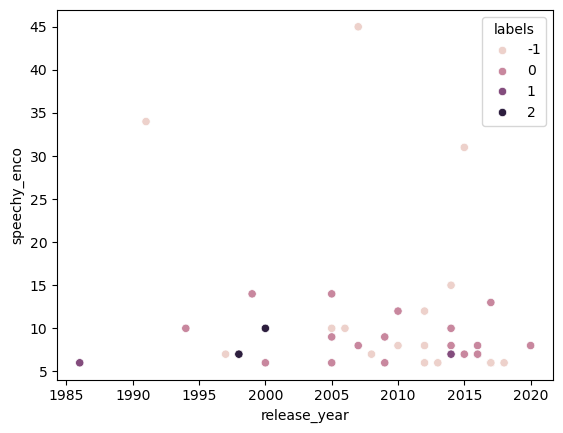

In [61]:
sns.scatterplot(data=df3, x='release_year', y='speechy_enco', hue='labels')
# Custom color palette (using colors by name or hex codes)
#custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF4500', '#00FA9A', '#D2691E']

#sns.scatterplot(data=df3, x='instru_encode', y='speechy_enco', hue='labels', palette=custom_palette)


In [62]:
#df3[df3['labels'] == -1]
#df3 = df3[df3['labels'] != -1]


In [70]:
#X2 = df[['instru_encode', 'speechy_enco']]

In [ ]:
#model2 = DBSCAN(eps=5, min_samples=2).fit(X2)
#model2.labels_
#df['labels'] = model2.labels_

#### Changes and additions:
Made Feature2 code much shorter(no more big code).

Made Feature4 code shorter too(no more massive elif tree)

K means is finished but horribly done.

Bro, if you read this, please finish DBSCAN if you can. Thank YOU!

If you can't, we'll try to do it on Monday!


Notes about DBSCAN: Do one for the df3(which is vetting playlist). After you find the cluster that the teacher is in, get every row in df3 with that cluster number(label). Look at instru and speechy, find something reasonable they have in common. Once you do that, make another dataset that pulls data from the big df with the criteria that you find.

Ex: Cluster 2, instru is 70 and speechy is 30. code : DB_df = df[(df['instru_encode'] >= 70) & (df['speechy_enco'] >= 30)]
Theoretically, if that works, that will create a smaller dataset with rows that meet that criteria. Then, uh, do what you can ahaha.